In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_roc_curve, make_scorer, balanced_accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar15/BRCA_pam50.tsv', index_col = 0, sep = '\t')
df

,UBE2T,BIRC5,NUF2,CDC6,CCNB1,TYMS,MYBL2,CEP55,MELK,NDC80,...,NAT1,FOXA1,BLVRA,MMP11,GPR160,FGFR4,GRB7,TMEM45B,ERBB2,Subtype
TCGA-A1-A0SB-01A,2.507502,2.172270,0.952906,1.683162,3.108067,3.332448,2.982268,1.613604,1.641565,1.218495,...,0.926850,2.869065,3.896839,1.387963,1.141875,0.544443,2.942855,0.875017,5.014075,Normal-like
TCGA-A1-A0SD-01A,3.016158,2.514871,1.509129,1.354016,3.685035,2.125453,3.047474,2.333704,1.996853,1.171520,...,4.905805,6.677118,5.044878,5.631087,3.942169,3.404177,3.655783,2.757977,5.999041,Luminal A
TCGA-A1-A0SE-01A,4.626989,3.289047,2.102190,2.116975,4.525954,2.906470,3.798966,2.745027,2.451070,2.070499,...,6.053451,6.690114,5.843557,5.504526,3.881691,1.038253,3.156081,1.355837,5.585759,Luminal A
TCGA-A1-A0SF-01A,3.417782,2.262844,1.569301,1.800667,3.823694,2.843952,3.807282,2.141323,2.082400,1.693568,...,6.883599,6.280921,5.705410,3.511572,4.374803,2.299735,3.054917,1.315680,5.215699,Luminal A
TCGA-A1-A0SG-01A,2.948244,2.298689,1.116282,1.552142,3.582144,2.886328,2.697313,1.968233,1.662241,1.280947,...,1.814486,6.284076,4.622443,6.845350,3.381032,3.586285,2.845107,3.359571,5.786065,Luminal A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BH-A0BV-11A,1.870352,1.072286,0.608802,0.902198,2.587268,2.266861,1.450288,0.952375,0.914605,0.726684,...,2.266702,4.919079,4.153488,0.861931,2.403286,0.401022,4.044734,1.569947,4.871977,Healthy
TCGA-BH-A0BC-11A,1.739019,1.219743,0.573760,0.935661,1.957932,2.211228,1.837159,1.142789,0.948133,0.433871,...,1.798099,4.237113,4.438927,0.786682,1.765614,0.761287,3.296281,1.124510,4.406197,Healthy
TCGA-BH-A0DD-11A,1.464052,0.597237,0.340499,1.037614,1.665574,1.312091,1.086920,0.623715,0.544445,0.429620,...,2.147100,1.172748,5.040978,0.415481,1.626146,0.113552,0.794801,0.177137,3.166627,Healthy
TCGA-BH-A0DH-11A,1.686862,1.206100,0.259961,0.704237,2.288728,1.789974,1.095518,0.541392,0.526630,0.471734,...,2.361668,4.795254,5.046676,1.342472,1.866943,0.619597,2.776416,1.925006,4.462839,Healthy


In [5]:
X = df.iloc[:, :-1].to_numpy()
y = df['Subtype'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state = 17, test_size = 0.2)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
#посмотрим что он нам даст при стандартных параметрах
y_pred = model.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.7416966685259369


In [7]:
params = {'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150, 200], 'max_depth': [1, 3, 5, 7, 9]}
gscv = GridSearchCV(model, params, scoring = make_scorer(balanced_accuracy_score), n_jobs=-1, cv = RepeatedStratifiedKFold(n_repeats = 10))
gscv.fit(X, y)
#кошмар он долгий конечно

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [10, 30, 50, 70, 90, 110, 130, 150,
                                          200]},
             scoring=make_scorer(balanced_accuracy_score))

In [9]:
y_pred1 = gscv.predict(X_test)
print(gscv.best_params_)
print(balanced_accuracy_score(y_pred1, y_test))

{'max_depth': 9, 'n_estimators': 90}
0.9979919678714859


# 4. Построить две модели линейного SVM для классификациирецидива рака молочной железы (bc_data.pkl, bc_ann.pkl). Перваямодель должна быть построена с использованием всех генов,вторая — на 11 генах (файл genes_SVM.txt). Вывести качествамоделей (TPR, TNR, ROC AUC) на обучающей и тестовойвыборках. Интерпретировать результат.

In [13]:
df = pd.read_pickle("bc_data.pkl")
ann = pd.read_pickle("bc_ann.pkl")
genes = "TRIP13;UBE2C;ZWINT;EPN3;KIF4A;ECHDC2;MTFR1;STARD13;IGFBP6;NUMA1;CCNL2".split(";")
dfg = df[genes]

In [14]:
X_train = df.loc[ann.loc[ann["Dataset type"] == "Training"].index].to_numpy()
y_train = ann.loc[ann["Dataset type"] == "Training", "Class"].to_numpy()

X_test = df.loc[ann.loc[ann["Dataset type"] == "Validation"].index].to_numpy()
y_test = ann.loc[ann["Dataset type"] == "Validation", "Class"].to_numpy()

X_train_genes = dfg.loc[ann.loc[ann["Dataset type"] == "Training"].index].to_numpy()
X_test_genes = dfg.loc[ann.loc[ann["Dataset type"] == "Validation"].index].to_numpy()

In [16]:
model = SVC(kernel="linear")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('The balanced accuracy score is', balanced_accuracy_score(y_test, y_pred))

The balanced accuracy score is 0.6041666666666666


In [17]:
M = confusion_matrix(y_test, y_pred)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print(M, TPR, TNR)

[[54 18]
 [13 11]]
[[54 18]
 [13 11]] 0.75 0.4583333333333333


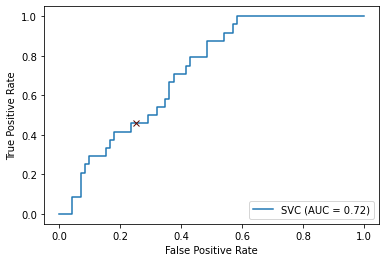

In [18]:
plot_roc_curve(model, X_test, y_test)
plt.plot(1 - TPR, TNR, "x", c="#640a00")
plt.show()

In [19]:
model = SVC(kernel="linear")
model.fit(X_train_genes, y_train)

y_pred = model.predict(X_test_genes)
print('The balanced accuracy score is', balanced_accuracy_score(y_test, y_pred))

The balanced accuracy score is 0.7291666666666667


In [22]:
M = confusion_matrix(y_test, y_pred)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print(M, TPR, TNR)

[[54 18]
 [ 7 17]] 0.75 0.7083333333333334


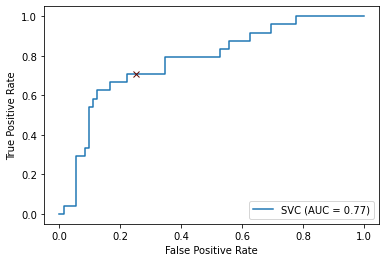

In [21]:
plot_roc_curve(model, X_test_genes, y_test)
plt.plot(1 - TPR, TNR, "x", c="#640a00")
plt.show()

# 5. Определить гены, средняя экспрессия которых статистическизначимо различается между обучающей и тестовой выборками(bc_data.pkl, bc_ann.pkl, использовать𝑡-критерий Стьюдента).Какова доля этих генов среди всех?

In [24]:
train = df.loc[ann.loc[ann["Dataset type"] == "Training"].index]
validation = df.loc[ann.loc[ann["Dataset type"] == "Validation"].index]

In [28]:
ttest_genes = []

for i in df.columns:
    if ttest_ind(train[i], validation[i])[1] < 0.05:
        ttest_genes.append(gene)
        
print(len(ttest_genes))
print(len(ttest_genes)/len(df.columns))

4661
0.6004895645452203
